Column names in dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume'], dtype='object')


<ipython-input-4-0cd7f6263088>:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


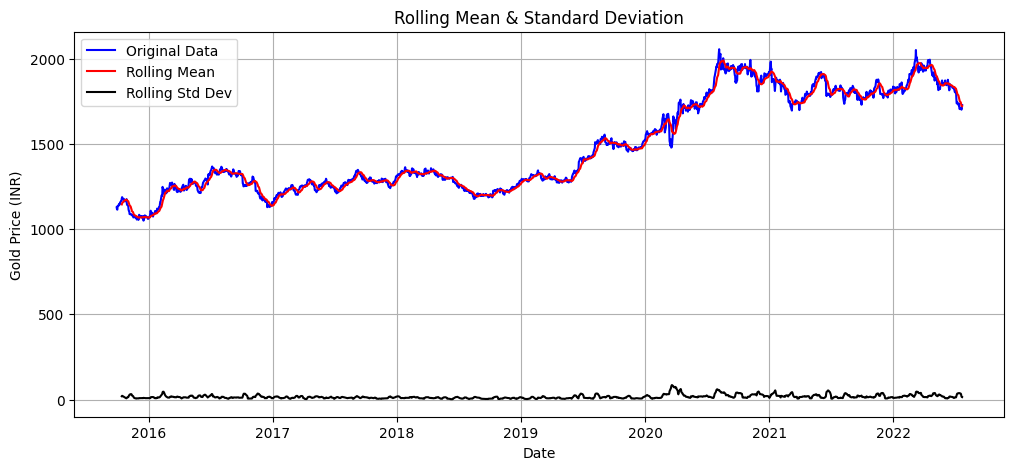


Dickey-Fuller Test Results:
Test Statistic            -1.116736
p-value                    0.708352
# Lags Used                7.000000
# Observations Used     1796.000000
Critical Value (1%)       -3.433996
Critical Value (5%)       -2.863151
Critical Value (10%)      -2.567627
dtype: float64

❌ The data is NOT stationary (Fail to reject H0)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


df = pd.read_csv("/content/gold_data.csv")

# Print column names to verify
print("Column names in dataset:", df.columns)

date_col = "Date"  # Change if needed
gold_price_col = "Price"  # Update based on actual column name


df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.set_index(date_col, inplace=True)

# Drop missing values if any
df.dropna(subset=[gold_price_col], inplace=True)

# Function to check stationarity
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 5))
    plt.plot(timeseries, color='blue', label="Original Data")
    plt.plot(rolling_mean, color='red', label="Rolling Mean")
    plt.plot(rolling_std, color='black', label="Rolling Std Dev")
    plt.xlabel("Date")
    plt.ylabel("Gold Price (INR)")
    plt.title("Rolling Mean & Standard Deviation")
    plt.legend()
    plt.grid()
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print("\nDickey-Fuller Test Results:")
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_results = pd.Series(adf_test[:4], index=["Test Statistic", "p-value", "# Lags Used", "# Observations Used"])
    for key, value in adf_test[4].items():
        adf_results[f"Critical Value ({key})"] = value
    print(adf_results)

    # Interpret the test results
    p_value = adf_test[1]
    if p_value <= 0.05:
        print("\n✅ The data is stationary (Reject H0)")
    else:
        print("\n❌ The data is NOT stationary (Fail to reject H0)")

# Check stationarity of gold price data
check_stationarity(df[gold_price_col])
